# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [1]:
#Import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os
import numpy as np
from keras.callbacks import  EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

Using TensorFlow backend.


In [2]:
#Load dataset
data = pd.read_json("data/data/Sarcasm_Headlines_Dataset.json", lines=True)

In [3]:
#Check dataset
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
#To see what all columns are there in the dataset 
print(data.columns)

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')


In [5]:
#Printing important information about the loaded dataset
#Information like len of dataset
print("Data length = ",len(data))

print("\n")
print("Data type = ",type(data))


print("\n")
print("Data shape = ",data.shape)


Data length =  26709


Data type =  <class 'pandas.core.frame.DataFrame'>


Data shape =  (26709, 3)


In [6]:
#Cross check step
#print number of classes in target variable and total class in dataset
print("Unique classes in data =",np.unique(data['is_sarcastic']))
print("Total classes in data =",len(np.unique(data['is_sarcastic'])))

Unique classes in data = [0 1]
Total classes in data = 2


In [7]:
#Cross check step
#To see number of words in data column name headline
print("Total number of words in train = ",len(np.unique(np.hstack(data['headline']))))

Total number of words in train =  26602


In [8]:
#Cross check step
#To see number of words in data column name headline article_link
print("Total number of words in train = ",len(np.unique(np.hstack(data['article_link']))))

Total number of words in train =  26708


In [9]:
#print imp information like total count of 1 and 0 in the dataset
count=0
count1=0
for i in data['is_sarcastic']:
    if i==1:
        count+=1
        
    else:
        count1+=1
        
print("Total number of 1 in data['is_sarcastic'] = ",count)
print("Total number of 0 in data['is_sarcastic'] = ",count1)
print("Total number of values in data['is_sarcastic'] = ",count+count1)

Total number of 1 in data['is_sarcastic'] =  11724
Total number of 0 in data['is_sarcastic'] =  14985
Total number of values in data['is_sarcastic'] =  26709


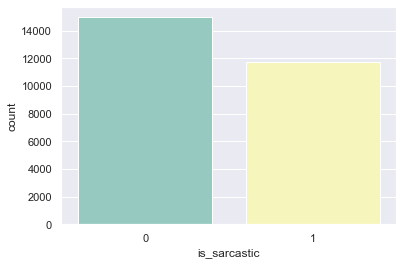

In [10]:
#plot count of 0 and 1 in the target column of the dataset
sns.set(style="darkgrid")
ax = sns.countplot(x="is_sarcastic", data=data, palette="Set3")

Mean 60.91 words (19.184111)


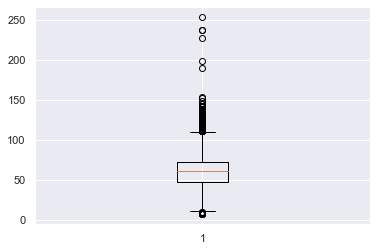

In [11]:
#Visualize step
# Summarize review length for data['headline']
#This cell shows how long each data is and based on that it give mean and std of lenght of each sequence
result = [len(x) for x in data['headline']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()


#Note: here you can see avg length is arnd 60

Mean 92.34 words (16.971156)


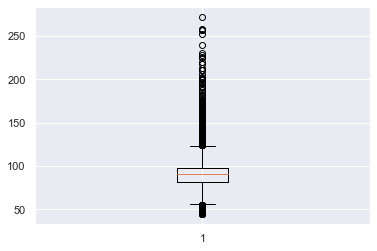

In [12]:
#Visualize step
# Summarize review length for data['article_link']
#This cell shows how long each data is and based on that it give mean and std of lenght of each sequence
result = [len(x) for x in data['article_link']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

#Note: here you can see avg length is arnd 92

#### Data insights
1. As you can see data has 3 columns where 1 column 'article_link' is not important
2. The data['headline'] has avg mean sequence of 60.91 with std  as 19.184111
3. The labels are either 0 or 1 and the number of 0 cases is more than 1
4. The Data length =  26709
5. Data doesn't have equal distribution

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [13]:
#Drop of unwanted column
data.drop(['article_link'], axis = 1, inplace=True) 

In [14]:
#print head of the remain dataset and to cross check if the 'article_link' column is dropped or not
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [15]:
#To store the len of each line in a dict
len1=[]
len1=[len(x) for x in data['headline']]
print(len1)

[78, 84, 79, 84, 64, 27, 46, 67, 50, 59, 63, 59, 70, 64, 51, 64, 88, 50, 58, 20, 50, 111, 66, 42, 71, 37, 58, 22, 57, 40, 55, 51, 65, 59, 65, 34, 33, 86, 67, 71, 64, 82, 56, 53, 41, 41, 92, 71, 38, 33, 28, 52, 65, 69, 88, 67, 72, 49, 66, 68, 28, 28, 41, 88, 69, 60, 71, 81, 43, 42, 39, 50, 39, 54, 80, 63, 58, 64, 32, 57, 59, 59, 68, 85, 61, 64, 104, 53, 87, 76, 29, 113, 79, 42, 62, 49, 73, 54, 65, 44, 51, 67, 47, 55, 28, 68, 37, 64, 41, 63, 69, 77, 43, 118, 40, 71, 57, 107, 85, 69, 52, 22, 56, 60, 58, 65, 76, 58, 36, 82, 60, 57, 33, 58, 42, 58, 61, 63, 76, 61, 61, 59, 54, 47, 67, 52, 57, 48, 62, 73, 43, 67, 32, 77, 51, 62, 50, 66, 49, 88, 47, 43, 54, 80, 85, 84, 57, 91, 60, 48, 48, 64, 75, 40, 61, 36, 70, 25, 59, 50, 81, 97, 63, 47, 57, 48, 90, 61, 67, 66, 65, 72, 43, 40, 56, 90, 40, 43, 63, 96, 46, 96, 66, 66, 48, 91, 43, 29, 68, 49, 62, 40, 80, 85, 28, 123, 51, 58, 88, 61, 76, 57, 76, 62, 21, 55, 57, 56, 72, 24, 60, 57, 75, 60, 45, 51, 83, 60, 48, 60, 35, 94, 64, 58, 50, 36, 34, 76, 2

In [16]:
#To get max of sequence length
max_seq=max(len1)
print(max_seq)

254


#**## Modelling**

## Import required modules required for modelling.

In [17]:
#import important lib for lstm
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [18]:
#Defining important variable
max_features = 20000
maxlen = max_seq
embedding_size = 200
Epochs=7
batch=100

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [19]:
#Tokenize the input data so to covert each sentence into sequence
token=Tokenizer(num_words=max_features) 
token.fit_on_texts(data['headline'])
input_sequences = token.texts_to_sequences(data['headline'])

In [20]:
#Cross check step to see first 5 coded sequence
input_sequences[0:5]

[[307, 15114, 678, 3336, 2297, 47, 381, 2575, 15115, 5, 2576, 8433],
 [3, 8434, 3337, 2745, 21, 1, 165, 8435, 415, 3111, 5, 257, 8, 1001],
 [144, 837, 1, 906, 1748, 2092, 581, 4718, 220, 142, 38, 45, 1, 10735],
 [1484, 35, 223, 399, 1, 1831, 28, 318, 21, 9, 2923, 1392, 6968, 967],
 [766, 718, 4719, 907, 10736, 622, 593, 4, 3, 94, 1308, 91]]

# Define X and y for your model.

In [21]:
#Here we are using padding lib to pad sequence with max seq 254
X = pad_sequences(input_sequences, maxlen = max_seq, padding='post')
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[  307 15114   678  3336  2297    47   381  2575 15115     5  2576  8433
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [22]:
# get the word to index mapping for input
word2idx_inputs = token.word_index #This creates words to index dictionary where key is word and vlaue us the dictionary
print('Found %s unique input tokens.' % len(word2idx_inputs))

Found 29656 unique input tokens.


In [23]:
#This is reverse mapping of the the word 2 index dictionary. This is used to trace back the sequence
idx2words={v:x for x,v in word2idx_inputs.items()} 
len(idx2words)

29656

In [24]:
num_words_output = len(word2idx_inputs) + 1 #Here plus 1 as index start from 0
num_words_output

29657

#**## Word Embedding**

## Get Glove Word Embeddings

In [25]:
#This is used to navigate the to the directory of pre trained embeddings
print(os.getcwd())
print('\n')
print(os.listdir())
print('\n')
print(os.listdir('data'))
print('\n')
print(os.listdir('data/Data')) #Here you can see all the glove vectors

C:\Users\sarth\Anaconda projects\great learning\AI\NPL\project2


['.ipynb_checkpoints', 'data', 'github', 'glove.6B.100d.txt', 'NLP_Project_Sarcasm_Detection_Questions.ipynb', 'Problem Statement - Project - LSTM.pdf', 'qw.ipynb']


['Data', 'Data-20200412T173825Z-001.zip', 'Data-20200412T173825Z-002.zip']


['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.50d.txt', 'Sarcasm_Headlines_Dataset.json']


# Get the Word Embeddings using Embedding file as given below.

In [26]:
#load Pretrained glove vector from file
#Note the pretrained are of 200 dim long as I am using it from 'glove.6B.200d. This embed each word with 200 dimensions
EMBEDDING_FILE = 'data/Data/glove.6B.200d.txt'   #location of the vector

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"): #import data from file
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:] #Store value in the variable
    embd = np.asarray(embd, dtype='float32') 
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings)) #print lenth of the dict that stored value

Found 400000 word vectors.


# Create a weight matrix for words in training docs

In [27]:
#this is that embedding from embeddings that are in embeddings in our dataset
#This steps store only those vectors that are there in our dictionary word2idx_inputs
#Only those word's vectors that are there in our vocabulary
EMBEDDING_DIM = 200
num_words = max(max_features, len(word2idx_inputs) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in token.word_index.items():
    embedding_vector = embeddings.get(word)  #Get pretrained glove vector from word2vec that are there in our vocalbulary and stroe in some other variable one by one
    if embedding_vector is not None:    # words not found in embedding index will be all zeros.
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

#Note the embedding_matrix is nothing but the pretrained glove vector from file 'glove.6B.200d.txt' but has only those words that are there in our dictionary

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [28]:
#Model buliding
model = Sequential()  #Sequential model
model.add(Embedding(num_words, EMBEDDING_DIM, input_length = max_seq, weights = [embedding_matrix]))
#embedding layer takes input of vocabulary size, embedding dimension i.e 200 and input sequence i.e number of columns of dataset i.e 254
#Here I am using pretrained glove vector stored in variable 
model.add(Dropout(0.5)) #use dropout for regularization embedding_matrix
model.add(Bidirectional(LSTM(100, dropout=0.5)))  #Hidden layer with dropout Here return_sequences=true as I want to get output from all layer than apply global max pool over all the output so that I dont miss out important info
model.add(Dense(1, activation="sigmoid")) #Final dense layer 

Note: Extra Dropout layer is used so that the model does not overfit

In [29]:
#print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 254, 200)          5931400   
_________________________________________________________________
dropout (Dropout)            (None, 254, 200)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 6,172,401
Trainable params: 6,172,401
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [30]:
#Compile model with optimizer adam, loss as binary cross entropy and metric is accuracy
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [31]:
#Define checkpoint, early stop and reduced lr
stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=1e-6, verbose=1, mode="min") 

In [32]:
#Fitting model to X and y with defined epochs and batch size
#Here I have used requlaization and model performance tech such as reduced lr and early stop

r = model.fit(
  X,
  y,
  batch_size=batch,
  epochs=Epochs,
  validation_split = 0.2,
  callbacks=[reduce_lr, stop],
  verbose=1
)

Train on 21367 samples, validate on 5342 samples
Epoch 1/7
21367/21367 [==============================] - 57s 3ms/sample - loss: 0.5561 - acc: 0.7036 - val_loss: 0.4112 - val_acc: 0.8115
Epoch 2/7
21367/21367 [==============================] - 45s 2ms/sample - loss: 0.4213 - acc: 0.8033 - val_loss: 0.3571 - val_acc: 0.8446
Epoch 3/7
21367/21367 [==============================] - 45s 2ms/sample - loss: 0.3609 - acc: 0.8392 - val_loss: 0.3212 - val_acc: 0.8630
Epoch 4/7
21367/21367 [==============================] - 45s 2ms/sample - loss: 0.3177 - acc: 0.8617 - val_loss: 0.2993 - val_acc: 0.8729
Epoch 5/7
21367/21367 [==============================] - 45s 2ms/sample - loss: 0.2797 - acc: 0.8797 - val_loss: 0.3208 - val_acc: 0.8738
Epoch 6/7
21300/21367 [============================>.] - ETA: 0s - loss: 0.2538 - acc: 0.8940
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
21367/21367 [==============================] - 45s 2ms/sample - loss: 0.2536 - acc: 0.

In [33]:
#Evaluate model then print accuracy
results = model.evaluate(X, y)
print('Model accuracy: ', results[1])

26709/26709 [==============================] - 20s 738us/sample - loss: 0.1705 - acc: 0.9332
Model accuracy:  0.933206


In [34]:
#Getting prediction of dataset
predictions = model.predict(X)

In [35]:
#Set threshold
#we want the value to be either 0 or 1
pred2=np.zeros((len(X),))
count=0
for i in predictions:
    if i>0.5:  #Got .5 after many hit and try
        pred2[count]=1
    
    else:
        pred2[count]=0
    
    count+=1
        
#threshold is 0.5

In [36]:
#print value after threshold
pred2

array([0., 0., 1., ..., 0., 0., 0.])

In [37]:
#print accuracy score, f1 score, precision, recall and classification report
print("accuracy : {0:.4f}".format(accuracy_score(y,pred2)))
print("F1 score : {0:.4f}".format(f1_score(y,pred2)))
print("precision score : {0:.4f}".format(precision_score(y,pred2)))
print("recall score : {0:.4f}".format(recall_score(y,pred2)))
print(metrics.classification_report(y,pred2))

accuracy : 0.9332
F1 score : 0.9228
precision score : 0.9369
recall score : 0.9091
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14985
           1       0.94      0.91      0.92     11724

    accuracy                           0.93     26709
   macro avg       0.93      0.93      0.93     26709
weighted avg       0.93      0.93      0.93     26709



In [38]:
#print AUC for dataset
aucs = []
for j in range(6):
    auc = roc_auc_score(y, predictions)
    aucs.append(auc)
print(np.mean(aucs))


0.982077374770426


In [39]:
#To see what out model stores info so that these can be plotted
print(r.history)

{'loss': [0.5561266658628818, 0.42131696918518746, 0.36090928734690625, 0.3177028469489935, 0.27965101879138016, 0.2536385065730846, 0.22477696535140088], 'acc': [0.70356154, 0.8033416, 0.83919126, 0.86165583, 0.87972105, 0.8941826, 0.9092058], 'val_loss': [0.41115727531959034, 0.35706976911897564, 0.3211711286181861, 0.29927148282505606, 0.3207752896087172, 0.3239169027621449, 0.30895475652145565], 'val_acc': [0.8114938, 0.8446275, 0.8629727, 0.87289405, 0.87383, 0.8702733, 0.87794834], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.00020000001]}


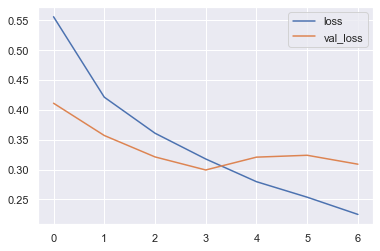

In [40]:
# plot model loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

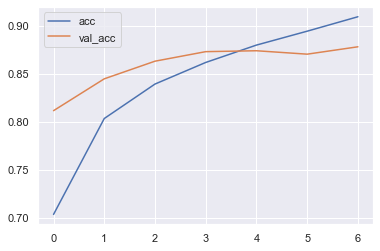

In [41]:
#plot model accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

#### Note
The model is performing very well..

#### Some predictions

In [49]:
#Check on this
n=100

In [50]:
print("X_test shape = ",X.shape) #To see shape of X_test

x=X[n]  #Put test value in x
print("Shape of x = ",x.shape)
#AS you can see it is out of shape when comared to x_test because it is a single value therefore we need to reshape it

x2=x.reshape(1,max_seq)  #Reshape to (1,254) so to put in our model if not done this step it will throw error as our model accept this shape only

print("New Shape of x = ",x2.shape) #Cross check step to see our new shape

P=model.predict(x2) #predict x based on our model

P2 = 1 if P>0.5 else 0  #Setting threshold if value less than 0.5 it is -ve review otherwise poistive

print("\n")
print("Predicted review = ",P2) #predicted review
print("Actual value = ",y[n])
print("\n")

if P2==1: #To print if sarcastic or not
    print('1 means sarcastic therfore this statement is SARCASTIC')
else:
    print('0 means not sarcastic therfore this statement is NOT SARCASTIC')    


X_test shape =  (26709, 254)
Shape of x =  (254,)
New Shape of x =  (1, 254)


Predicted review =  0
Actual value =  0


0 means not sarcastic therfore this statement is NOT SARCASTIC


In [51]:
#This step is visual step where encoding in the dataset is converted back to readable or alphabetic form 
#Here each integer in the text is matched with the index, and replaced by the corresponding word

def decode(text):
    return ' '.join([idx2words.get(i," ") for i in text])

In [52]:
#This returns the decoded value by using above decoded function
k=decode(X[n])
print(k)
#Note here data sequence is less as in tokenization step many words didnt get mapped as this is the downside of using lib

demi lovato drops emotional 'nightingale' music vid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              


### Some real examples 

In [53]:
#This function takes input and convert to appropriate format so that it can predict. Here all instances are used based on previous instances
def tokeniz(sent):
    sent1 = token.texts_to_sequences([sent]) #tokenization
    sent2 = pad_sequences(sent1, maxlen = max_seq, padding='post') #padding
    p=model.predict(sent2) #predicting
    return p

In [54]:
def prediction(p):
    Pred = 1 if p>0.5 else 0  #condition to check if its greater than 0.5
    print("Predicted review = ",Pred) #predicted review
    if Pred==1:  #To print if sarcastic or not
        print('1 means sarcastic therfore this statement is SARCASTIC')
    else:
        print('0 means not sarcastic therfore this statement is NOT SARCASTIC')    

In [55]:
#Here  have used my own dialog or comment to see if its sarcatic or not based on our model
#Here I used sarcastic comment
k="Zombies eat brains. You’re safe."
pred = tokeniz(k)
prediction(pred)

Predicted review =  1
1 means sarcastic therfore this statement is SARCASTIC
